In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kruskal

In [2]:
scoresT5 = {
    'T5 GoBack': np.load("results/F1_t51.npy"),
    'T5 ReadAfterward': np.load("results/F1_t52.npy"),
    'T5 Jump': np.load("results/F1_t53.npy")
}

df_scoresT5 = pd.DataFrame(scoresT5)

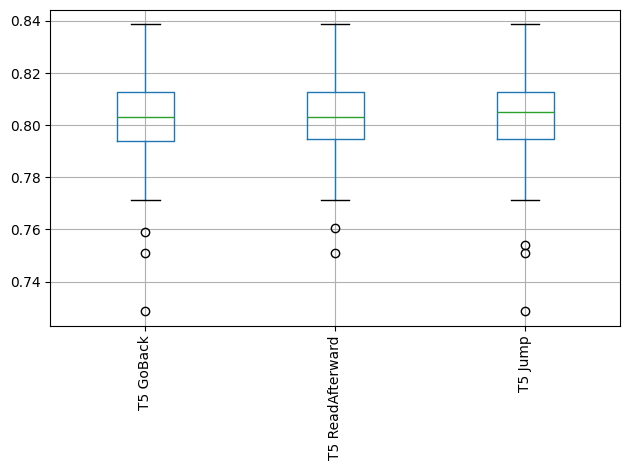

In [3]:
df_scoresT5.boxplot()
plt.xticks(ticks=range(1, len(df_scoresT5.columns) + 1), labels=df_scoresT5.columns, rotation=90)
plt.tight_layout()
plt.savefig("T5 Test boxplot.png")
plt.show()

C:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


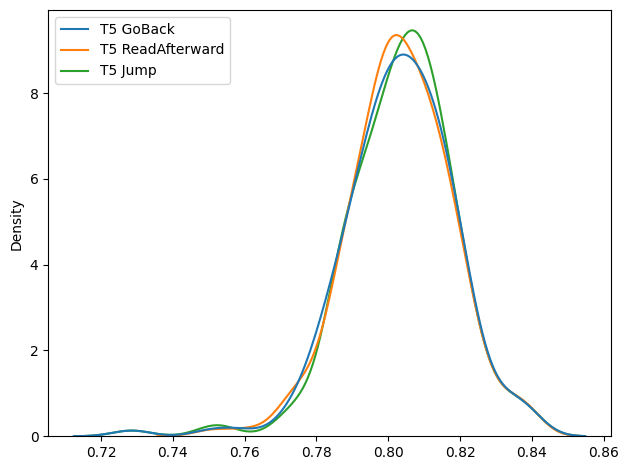

In [4]:
sns.kdeplot(data=df_scoresT5)
plt.tight_layout()
plt.savefig("T5 Test KDE plot.png")
plt.show()

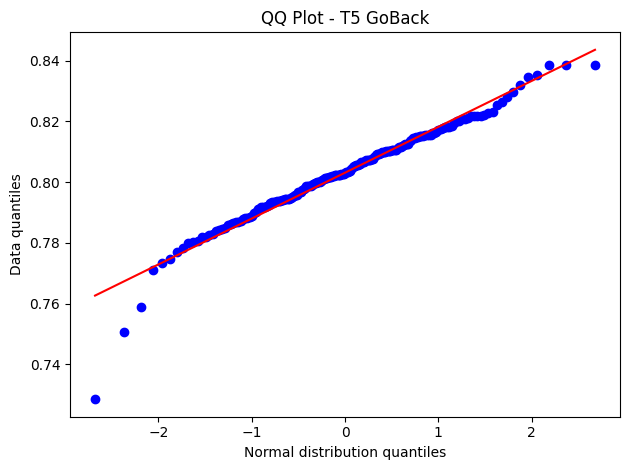

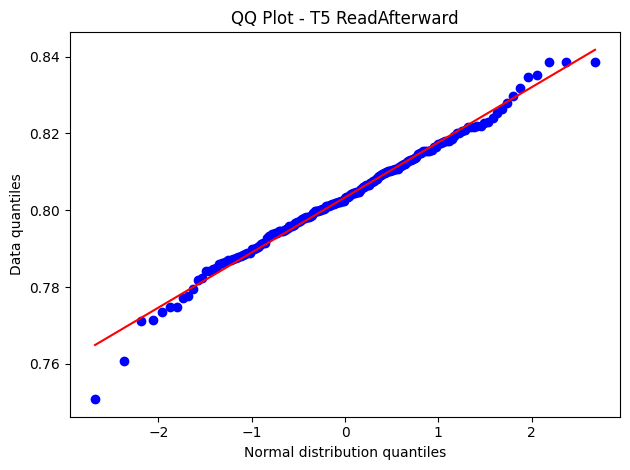

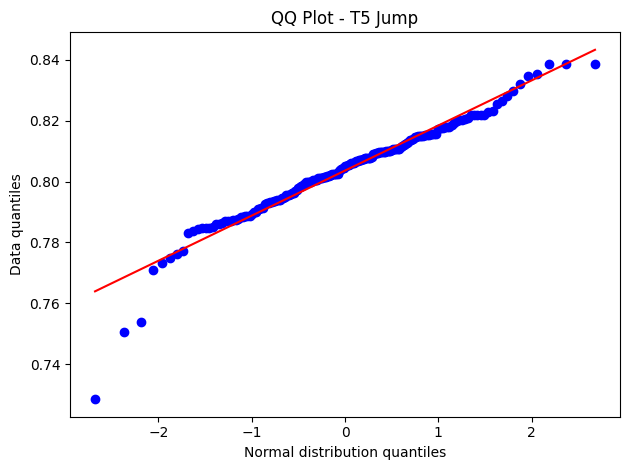

In [5]:
for i, col in enumerate(df_scoresT5.columns):
    stats.probplot(df_scoresT5[col], plot=plt)
    plt.title(f'QQ Plot - {col}')
    plt.xlabel('Normal distribution quantiles')
    plt.ylabel('Data quantiles')
    plt.tight_layout()
    plt.savefig(f"T5_Test_QQ_Plot_{col}.png")

    plt.show()

In [6]:
statistic, p_value = stats.levene(scoresT5['T5 GoBack'], \
                                  scoresT5['T5 ReadAfterward'], \
                                  scoresT5['T5 Jump'])

print("Levene's statistic:", statistic)
print("p value:", p_value)

if p_value < 0.05:
    print("There is evidence to reject the null hypothesis of equal variances (homoscedasticity).")
else:
    print("There is no evidence to reject the null hypothesis of equal variances (homoscedasticity).")


Levene's statistic: 0.10375481290018927
p value: 0.9014636800911585
There is no evidence to reject the null hypothesis of equal variances (homoscedasticity).


In [7]:
kruskal_result = kruskal(scoresT5['T5 GoBack'], \
                         scoresT5['T5 ReadAfterward'], \
                         scoresT5['T5 Jump'])

print("Kruskal-Wallis statistic:", kruskal_result.statistic)
print("p value:", kruskal_result.pvalue)

if kruskal_result.pvalue < 0.05:
    print("There is a statistically relevant difference between at least 2 groups (T5).")
else:
    print("No statistically relevant difference between groups (T5).")

Kruskal-Wallis statistic: 0.1942255230837058
p value: 0.9074536744883487
No statistically relevant difference between groups (T5).


In [8]:
anova_result = stats.f_oneway(scoresT5['T5 GoBack'],\
                              scoresT5['T5 ReadAfterward'],\
                              scoresT5['T5 Jump'])

print("ANOVA statistic:", anova_result.statistic)
print("p value:", anova_result.pvalue)

if anova_result.pvalue < 0.05:
    print("There is a statistically relevant difference between at least 2 groups (T5).")
else:
    print("No statistically relevant difference between groups (T5).")

ANOVA statistic: 0.049297827052928185
p value: 0.9519017319758516
No statistically relevant difference between groups (T5).
